In [1]:
import tensorflow as tf
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import cv2 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation,Conv2D,Dense,Dropout,Flatten, MaxPooling2D

## Downloading the MNIST data 

In [4]:
mnist = tf.keras.datasets.mnist

In [6]:
#unpacking data into training data and testing data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
#In total there are 60,000 images, 28x28 in size
x_train.shape

(60000, 28, 28)

## Data example 

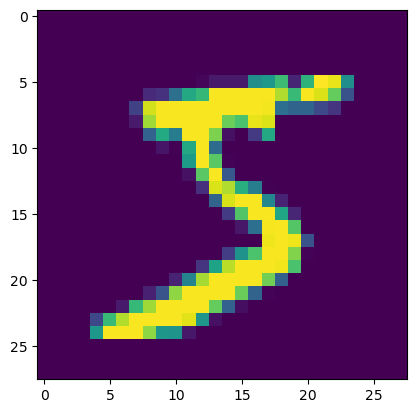

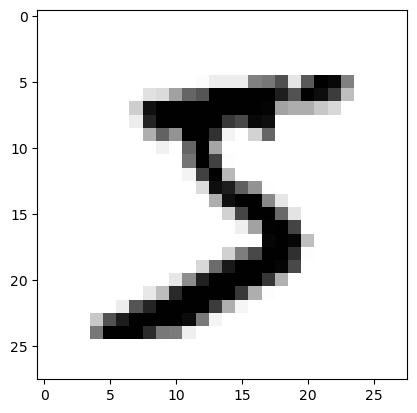

In [11]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap=plt.cm.binary)

It is important to note here that when using cmap=plt.cm.binary, the colors are inverted, i.e. the actual image has black background and white digit

In [14]:
#data before normalization
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Image is a tensor of integer from 0 to 255. Therefore, the lightness of each pixel ranges from 0 to 255, 0 being black and 255 being white

## Data normalization and pre-processing


In [18]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

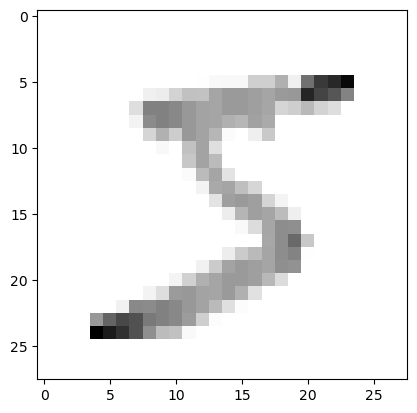

In [20]:
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [22]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Normalization scaled down the lightness of each pixel, while preserving the light ratio. Now it is from 0 to 1

## Resizing the image. Preparation step for Convolution operation

In [26]:
img_size=28
x_test_norm=np.array(x_test).reshape(-1,img_size,img_size,1)
x_train_norm=np.array(x_train).reshape(-1,img_size,img_size,1)

We add one more dimension, which is the color channel. As our picture is gray, the value is 1

In [29]:
print("dimensions of testing samples:", x_test_norm.shape)
print("dimensions of training samples:", x_train_norm.shape)

dimensions of testing samples: (10000, 28, 28, 1)
dimensions of training samples: (60000, 28, 28, 1)


## Convolutional Neureal Network

In [73]:
model=Sequential()

In [75]:
#Convolution layers
#first
model.add(Conv2D(64, (3,3), input_shape=x_train_norm.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#second
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#third
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [77]:
#Flatteting. This converts the image from 2D to 1D
model.add(Flatten())

In [79]:
#Layer 1
model.add(Dense(64))
model.add(Activation("relu")) #relu
#Layer 2
model.add(Dense(32))
model.add(Activation("relu")) 
#Layer 3
model.add(Dense(10))
model.add(Activation('softmax'))

## Training model

In [81]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(x_train_norm,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7900 - loss: 0.6586 - val_accuracy: 0.9488 - val_loss: 0.1624
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.9663 - loss: 0.1102 - val_accuracy: 0.9684 - val_loss: 0.1003
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9769 - loss: 0.0756 - val_accuracy: 0.9718 - val_loss: 0.0924
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9810 - loss: 0.0580 - val_accuracy: 0.9812 - val_loss: 0.0643
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9862 - loss: 0.0447 - val_accuracy: 0.9810 - val_loss: 0.0663


training the model

## Results

In [83]:
test_loss, test_acc = model.evaluate(x_test_norm, y_test)
print("Test loss is", test_loss)
print("Test accuracy is", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9756 - loss: 0.0825
Test loss is 0.0641602948307991
Test accuracy is 0.9818999767303467


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


Text(95.72222222222221, 0.5, 'Actual value')

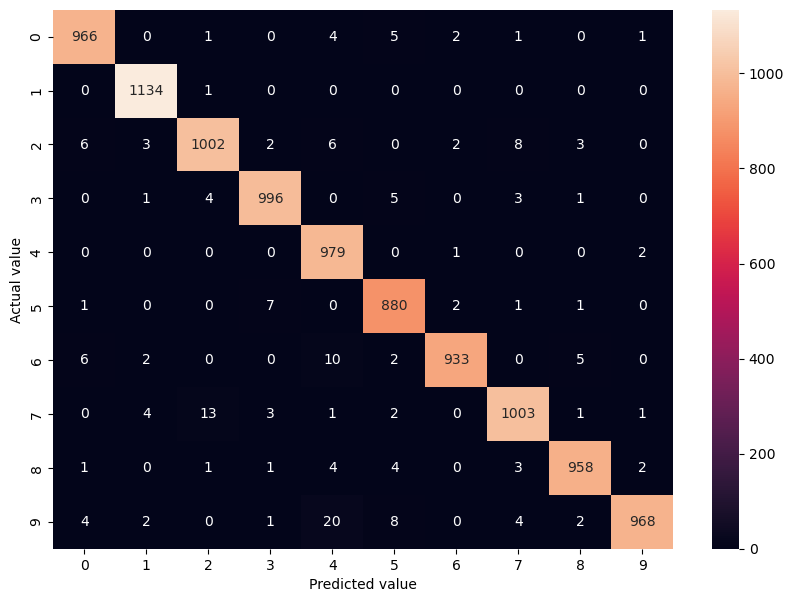

In [85]:
y_predicted = model.predict(x_test_norm)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [101]:
trainable_vars = model.trainable_variables
for var in trainable_vars:
    print(f"Variable: {var.name}, Shape: {var.shape}")

#In total, there are approximately 81k of parameters, which is fairly good result

Variable: kernel, Shape: (3, 3, 1, 64)
Variable: bias, Shape: (64,)
Variable: kernel, Shape: (3, 3, 64, 64)
Variable: bias, Shape: (64,)
Variable: kernel, Shape: (3, 3, 64, 64)
Variable: bias, Shape: (64,)
Variable: kernel, Shape: (64, 64)
Variable: bias, Shape: (64,)
Variable: kernel, Shape: (64, 32)
Variable: bias, Shape: (32,)
Variable: kernel, Shape: (32, 10)
Variable: bias, Shape: (10,)
